# Visualización de datos y conclusiones

In [19]:
# Importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Leer el CSV
df = pd.read_csv('./dataset/data.csv').head(10)
df

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,623,frozenset({'rolls/buns'}),frozenset({'whole milk'}),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
1,622,frozenset({'whole milk'}),frozenset({'rolls/buns'}),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
2,694,frozenset({'yogurt'}),frozenset({'whole milk'}),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
3,695,frozenset({'whole milk'}),frozenset({'yogurt'}),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
4,551,frozenset({'soda'}),frozenset({'other vegetables'}),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219
5,550,frozenset({'other vegetables'}),frozenset({'soda'}),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729
6,649,frozenset({'sausage'}),frozenset({'whole milk'}),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
7,648,frozenset({'whole milk'}),frozenset({'sausage'}),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140
8,624,frozenset({'yogurt'}),frozenset({'rolls/buns'}),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147
9,625,frozenset({'rolls/buns'}),frozenset({'yogurt'}),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071


Para graficar se necesitan las siguientes columnas:
+ antecedents
+ consequents
+ lift

Sin embargo, obtener estas columnas no es lo único que hay que hacer para graficar, ya que las primeras dos columnas que se necesitan son un objeto frozenset. 

Se requieren variables categóricas para graficar , asi que lo primero es convertir estos objetos a string

In [21]:
df.dtypes

Unnamed: 0              int64
antecedents            object
consequents            object
antecedent support    float64
consequent support    float64
support               float64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
dtype: object

In [22]:
# Convertir las siguientes columnas a string
df['antecedents'] = df['antecedents'].astype('string')
df['consequents'] = df['consequents'].astype('string')

In [23]:
# Eliminar 'frozenset({' y "})" de ambas columnas
df['antecedents'] = df['antecedents'].str.removeprefix("frozenset({")
df['antecedents'] = df['antecedents'].str.removesuffix("})")

df['consequents'] = df['consequents'].str.removeprefix("frozenset({")
df['consequents'] = df['consequents'].str.removesuffix("})")

In [24]:
# Visualizar resultado
df.open_cv[frozenset
# df.dtypes

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,623,'rolls/buns','whole milk',0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
1,622,'whole milk','rolls/buns',0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
2,694,'yogurt','whole milk',0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
3,695,'whole milk','yogurt',0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
4,551,'soda','other vegetables',0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219
5,550,'other vegetables','soda',0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729
6,649,'sausage','whole milk',0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
7,648,'whole milk','sausage',0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140
8,624,'yogurt','rolls/buns',0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147
9,625,'rolls/buns','yogurt',0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071


In [25]:
# ya que cada combinacion de productos se repite. Por el bien de la grafica, eliminar las filas con el index 1, 3, 5, 7 y 9.
df = df.drop([df.index[1], df.index[3], df.index[5], df.index[7], df.index[9]])
df

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,623,'rolls/buns','whole milk',0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
2,694,'yogurt','whole milk',0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
4,551,'soda','other vegetables',0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219
6,649,'sausage','whole milk',0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811
8,624,'yogurt','rolls/buns',0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147


In [26]:
# Añadir una nueva columna que una los antecedents con los consequents
df['combinaciones'] = df.antecedents.str.cat(df.consequents, sep=' - ')
df

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,combinaciones
0,623,'rolls/buns','whole milk',0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,'rolls/buns' - 'whole milk'
2,694,'yogurt','whole milk',0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,'yogurt' - 'whole milk'
4,551,'soda','other vegetables',0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,'soda' - 'other vegetables'
6,649,'sausage','whole milk',0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,'sausage' - 'whole milk'
8,624,'yogurt','rolls/buns',0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,'yogurt' - 'rolls/buns'


<strong>Resultado:</strong> Un dataset más limpio y con el formato apropiado.<br>

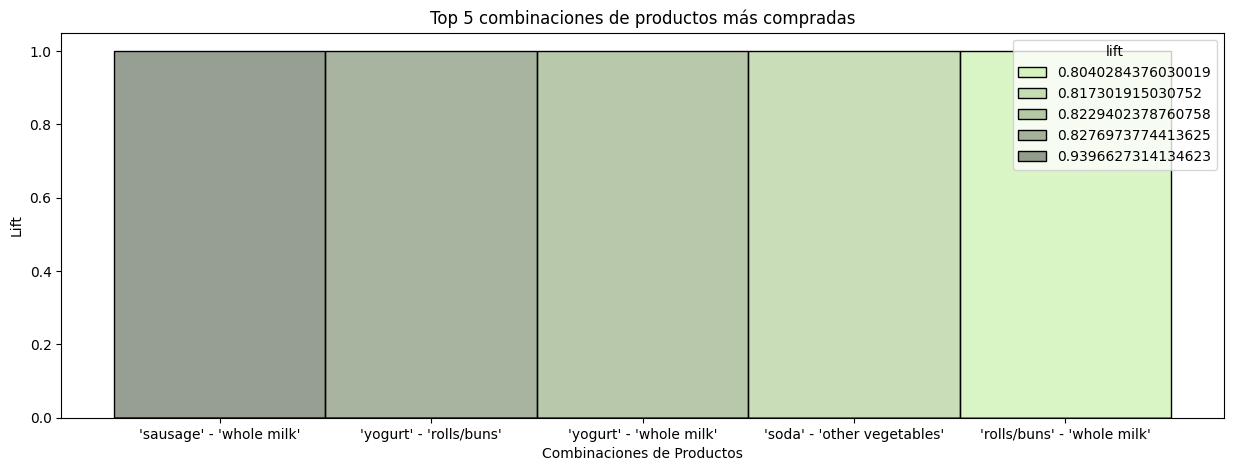

In [105]:
# Gráfico 1: Histograma
colores = ['#b5ea8c', '#94bf73', '#739559', '#526a40', '#314026']
data_viz = df.sort_values(by=['lift'], ascending=False)
plt.figure(figsize=(15, 5))
sns.histplot(
    data = data_viz,
    x = 'combinaciones',
    hue = 'lift',
    palette = colores)
plt.xlabel('Combinaciones de Productos')
plt.ylabel('Lift')
plt.title('Top 5 combinaciones de productos más compradas')
plt.show()

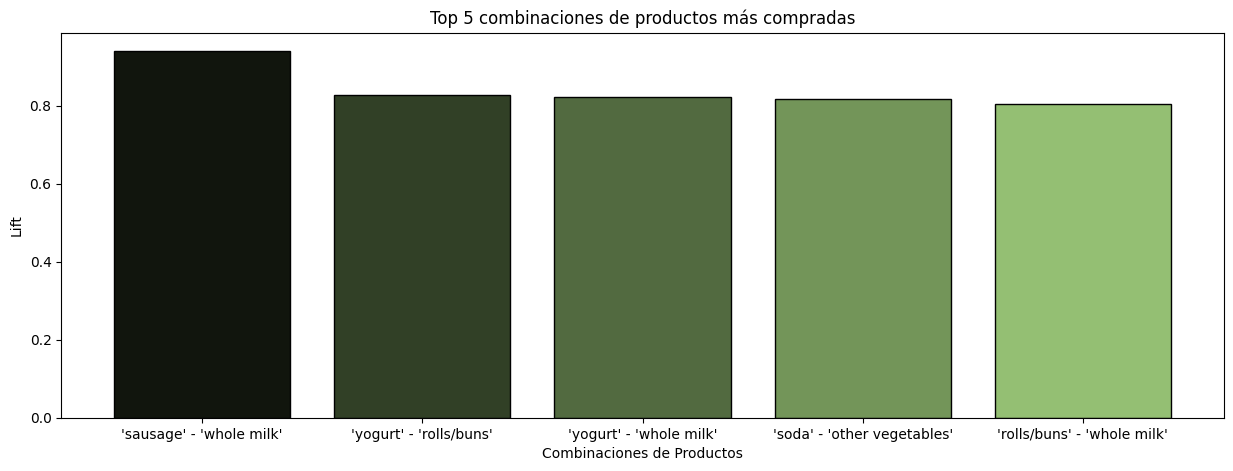

In [96]:
# Gráfico 2: Gráfico de barras
colores = ['#11150d', '#314026', '#526a40', '#739559', '#94bf73', '#b5ea8c']
data_viz2 = df.sort_values(by = ['lift'], ascending=False)
x = data_viz2['combinaciones']
y = data_viz2['lift']
plt.figure(figsize=(15, 5))
plt.bar(x, y, color=colores, edgecolor='black')
plt.xlabel('Combinaciones de Productos')
plt.ylabel('Lift')
plt.title('Top 5 combinaciones de productos más compradas')
plt.show()

<strong>Resultado:</strong> Las combinaciones de productos que más compran son
+ salchichas y leche
+ yogur y panecillos
+ yogur y leche
+ refrescos y verduras
+ panecillos y leche

Una posible explicación a estos resultados podría ser que la tienda de comestibles haya hecho una promoción para vender los artículos juntos o los haya colocado en la misma línea de visión para aumentar las ventas.